In [75]:
# Cargamos los datos de un archivo CSV

import pandas as pd

# Cargamos el archivo CSV
data = pd.read_csv('Datos_Limpios/UCL2022-2023.csv')

data.dtypes



Round Number               int64
Home Team                 object
Away Team                 object
Home Goals                 int64
Away Goals                 int64
Home Shots                 int64
Away Shots                 int64
Home Shots Keeper          int64
Away Shots Keeper          int64
Home Possesion             int64
Away Possesion             int64
Home Passes                int64
Away Passes                int64
Home Passes Completed      int64
Away Passes Completed      int64
Home Tackles               int64
Away Tackles               int64
Home Yellow Cards          int64
Away Yellow Cards          int64
Home Red Cards             int64
Away Red Cards             int64
Home Offside             float64
Away Offside             float64
Home Corners             float64
Away Corners             float64
dtype: object

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Suponiendo que 'data' contiene tus datos originales
label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])


# crear la columna Result para el resultado del partido en función de los goles aplicando 0 si es derrrota, 1 si es victoria

data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(lambda x: 1 if x > 0 else 0)

# Separar las características de la variable objetivo
X = data.drop(columns=['Result'])  # Características
y = data['Result']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de red neuronal el input sea el número de características menos Result de forma que salga un -1 si es derrrota, 0 si es empate y 1 si es victoria

model = tf.keras.Sequential([
    layers.Dense(100, activation='relu',
                 input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(100, activation='relu',
                 input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=64,
                    validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/150


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.4748 - loss: 0.7180 - val_accuracy: 0.5600 - val_loss: 0.6877
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5452 - loss: 0.6570 - val_accuracy: 0.4800 - val_loss: 0.6698
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6921 - loss: 0.6106 - val_accuracy: 0.6000 - val_loss: 0.6571
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7923 - loss: 0.5707 - val_accuracy: 0.6000 - val_loss: 0.6471
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8056 - loss: 0.5352 - val_accuracy: 0.6000 - val_loss: 0.6379
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8242 - loss: 0.5034 - val_accuracy: 0.6000 - val_loss: 0.6295
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8427 - loss: 0.4749 - val_accuracy: 0.5600 - val_loss: 0.6222
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8612 - loss: 0.4487 - val_accuracy: 0.5600 - val_loss: 0.6155
Epo

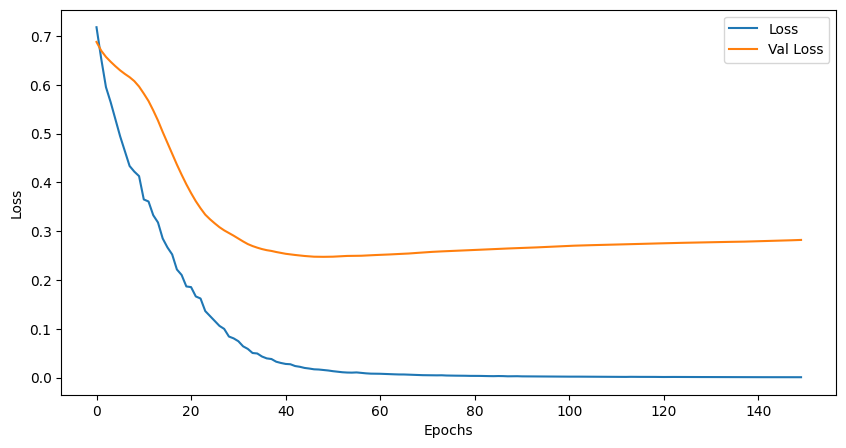

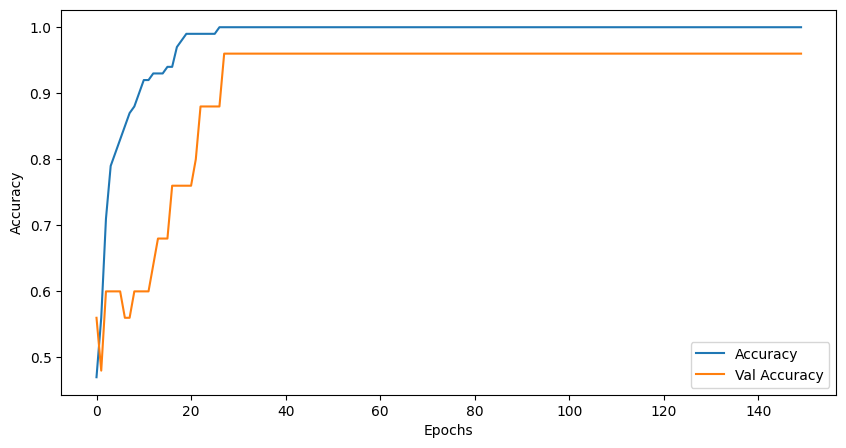

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


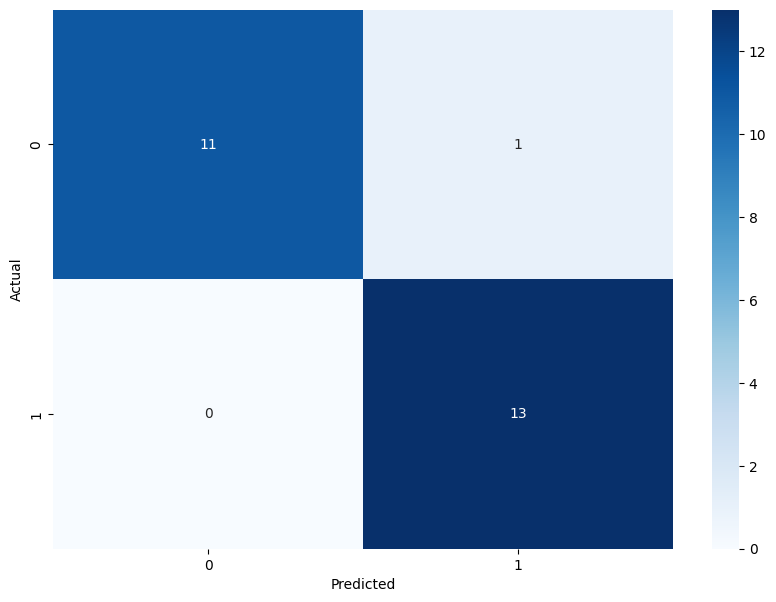

In [77]:
# Graficar la pérdida y la precisión y una matriz de confusión

# Pérdida
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Precisión
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled).round())

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [78]:
# predice un Real Madrid Manchester City

equipo1 = 'Manchester City'
equipo2 = 'Real Madrid'
equipo1 = label_encoder.transform([equipo1])
equipo2 = label_encoder.transform([equipo2])

# Crear un DataFrame con los datos del partido todos los datos son 0 excepto los equipos que se enfrentan
partido = pd.DataFrame(np.zeros((1, X.shape[1])), columns=X.columns)
partido['Home Team'] = equipo1
partido['Away Team'] = equipo2



# Normalizar los datos
partido_scaled = scaler.transform(partido)

# Predecir el resultado del partido
prediccion = model.predict(partido_scaled)
print(prediccion)
if prediccion < 0.5:
    print('El ganador es el equipo visitante')
else:
    print('El ganador es el equipo local')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.00267467]]
El ganador es el equipo visitante


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])

# crear la columna Result para el resultado del partido en función de los goles aplicando 0 si es derrota, 1 si es victoria
data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))

# Separar las características de la variable objetivo
X = data.drop(columns=['Result'])  # Características
y = data['Result']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de red neuronal con salida de 3 clases (-1, 0, 1)
model = tf.keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='tanh'),
    layers.Dense(3, activation='softmax')
])

# Compilar el modelo con la pérdida categórica cruzada esparcida
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train + 1, epochs=150, batch_size=64,
                    validation_data=(X_test_scaled, y_test + 1), verbose=1)

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test + 1)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/150


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.2433 - loss: 1.3163 - val_accuracy: 0.3200 - val_loss: 1.1469
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3033 - loss: 1.1736 - val_accuracy: 0.4000 - val_loss: 1.0517
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3931 - loss: 1.0455 - val_accuracy: 0.6000 - val_loss: 0.9873
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6127 - loss: 0.9472 - val_accuracy: 0.7200 - val_loss: 0.9490
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7063 - loss: 0.8826 - val_accuracy: 0.7200 - val_loss: 0.9277
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7144 - loss: 0.8265 - val_accuracy: 0.7200 - val_loss: 0.9132
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7196 - loss: 0.7848 - val_accuracy: 0.7200 - val_loss: 0.9006
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7106 - loss: 0.7502 - val_accuracy: 0.7200 - val_loss: 0.8863
Epo

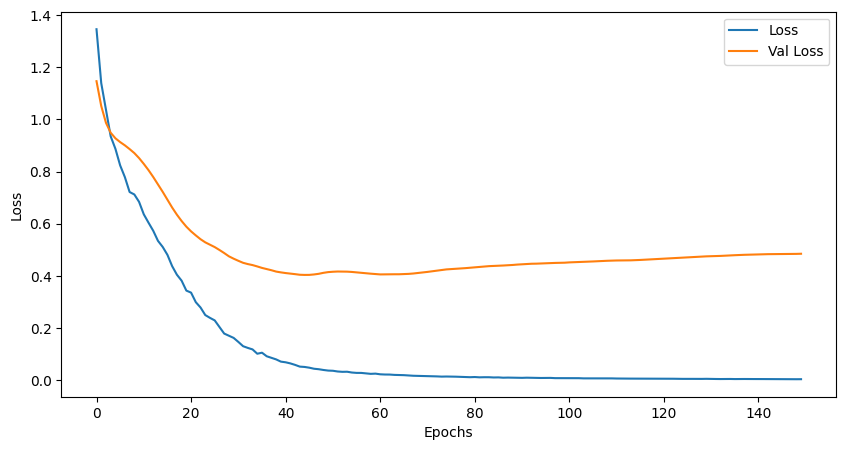

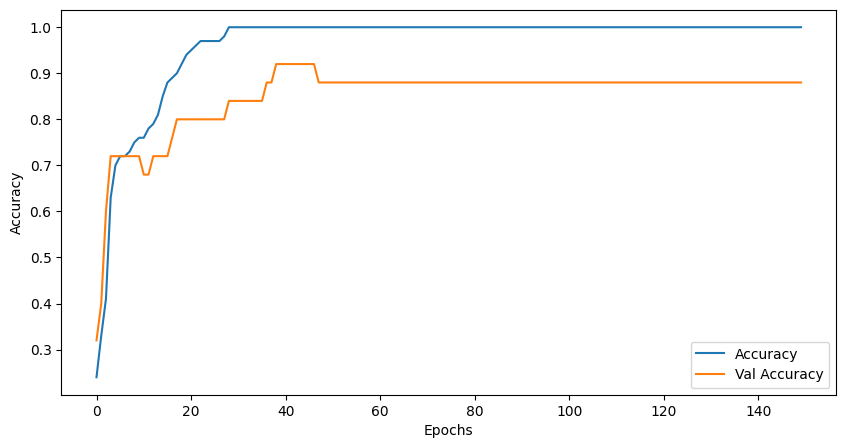

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


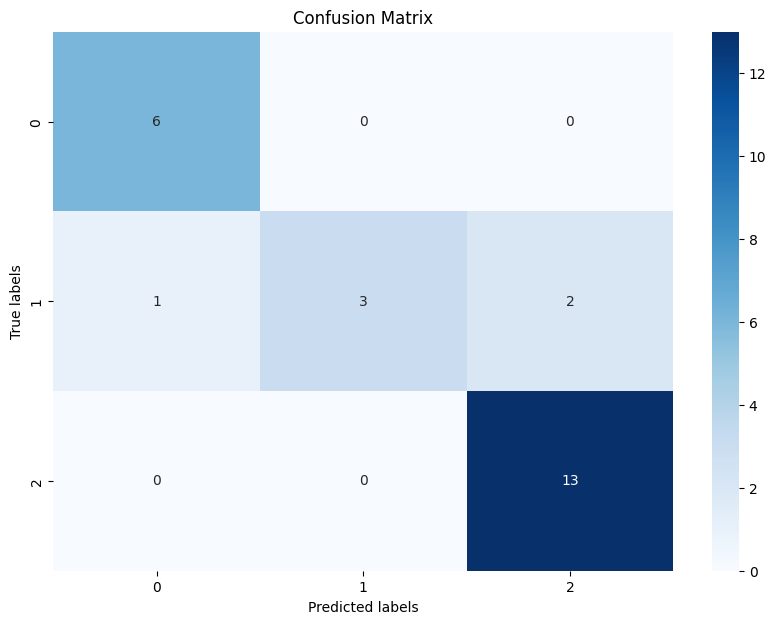

In [80]:
# Graficar la pérdida y la precisión y una matriz de confusión

# Pérdida
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Precisión
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Convertir la salida de la red neuronal a una etiqueta única
y_pred = np.argmax(model.predict(X_test_scaled), axis=1) - 1

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicciones de la red neuronal
y_pred = np.argmax(model.predict(X_test_scaled), axis=1) - 1

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Usar 'macro' para múltiples clases
recall = recall_score(y_test, y_pred, average='macro')  # Usar 'macro' para múltiples clases
f1 = f1_score(y_test, y_pred, average='macro')  # Usar 'macro' para múltiples clases

# Imprimir las métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Accuracy: 0.88
Precision: 0.9079365079365079
Recall: 0.8333333333333334
F1 Score: 0.8394383394383395


In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import time

# Leer los datos
data = pd.read_csv("Datos_Limpios/UCL2022-2023.csv")

# Codificar las variables categóricas
label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])

# Crear la columna Result para el resultado del partido en función de los goles aplicando 0 si es derrota, 1 si es victoria
data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(
    lambda x: 1 if x > 0 else (0 if x == 0 else -1))

# Separar las características de la variable objetivo
X = data.drop(columns=['Result'])  # Características
y = data['Result']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ajustes = []
capas = ["softmax", "relu", "sigmoid", "tanh", "linear"]
optimizadores = ["SGD", "RMSprop", "Adam", "AdamW", "Adadelta",
                "Adagrad", "Adamax", "Adafactor", "Nadam", "Ftrl", "Lion"]

batchs = [8, 16, 32, 64, 125]

num_capas = [1, 2, 3, 4, 5, 6, 7]
num_neuronas = [4, 8, 16, 32, 64, 128]
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

target_accuracy = 0.9
target_loss = 0.15

for i in range(70):
    # Configuración aleatoria
    configuracion_aleatoria = {
        "capa_activacion": random.choice(capas),
        "optimizador": random.choice(optimizadores),
        "num_capas": random.choice(num_capas),
        "num_neuronas": random.choice(num_neuronas),
        "learning_rate": random.choice(learning_rates),
        "batchs": random.choice(batchs)
    }

    # Crear el modelo con la configuración aleatoria
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        configuracion_aleatoria["num_neuronas"], activation=configuracion_aleatoria["capa_activacion"], input_shape=(X_train_scaled.shape[1],)))
    for _ in range(configuracion_aleatoria["num_capas"] - 1):
        model.add(tf.keras.layers.Dense(
            configuracion_aleatoria["num_neuronas"], activation=configuracion_aleatoria["capa_activacion"]))

    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    # Compilar el modelo con el optimizador y learning rate aleatorio
    optimizer = getattr(tf.keras.optimizers, configuracion_aleatoria["optimizador"])(
        learning_rate=configuracion_aleatoria["learning_rate"])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Definir early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


    # Entrenar el modelo con early stopping
    history = model.fit(X_train_scaled, y_train + 1, epochs=150, batch_size=64,
                        validation_data=(X_test_scaled, y_test + 1), callbacks=[early_stopping], verbose=1)

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_test_scaled, y_test + 1)

    ajustes.append(configuracion_aleatoria)

    time.sleep(3)
    print(i)

    # Guardar la configuración en un archivo de texto
    with open('ajustes3.txt', 'a') as f:
        for item in ajustes:
            f.write("%s\n" % str(item))
    ajustes = []

    if accuracy >= target_accuracy and 0 <= loss <= target_loss:
        print("Se alcanzó la precisión y la pérdida deseadas usando la siguiente configuración:")
        print(configuracion_aleatoria)
        break

# Graficar la pérdida y la precisión
print("El modelo alcanzó la precisión y la pérdida deseadas usando la siguiente configuración:")
print(configuracion_aleatoria)
print("La precisión fue de: ", accuracy)
print("La pérdida fue de: ", loss)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.3123 - loss: 1.1396 - val_accuracy: 0.5600 - val_loss: nan
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3175 - loss: 1.1383 - val_accuracy: 0.5600 - val_loss: nan
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3383 - loss: 1.1332 - val_accuracy: 0.5600 - val_loss: nan
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3175 - loss: 1.1348 - val_accuracy: 0.5600 - val_loss: nan
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3123 - loss: 1.1326 - val_accuracy: 0.5600 - val_loss: nan
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2967 - loss: 1.1354 - val_accuracy: 0.5600 - val_loss: nan
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3279 - loss: 1.1298 - val_accuracy: 0.5600 - val_loss: nan
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3175 - loss: 1.1301 - val_accuracy: 0.5600 - val_loss: nan
Epoch 9/150
2/2

KeyboardInterrupt: 

El modelo alcanzó la precisión y la pérdida deseadas usando la siguiente configuración:

{'capa_activacion': 'relu', 'optimizador': 'Nadam', 'num_capas': 1, 'num_neuronas': 128, 'learning_rate': 0.1, 'batchs': 125}

La precisión fue de:  0.9599999785423279

La pérdida fue de:  0.2832190692424774

{'capa_activacion': 'relu', 'optimizador': 'RMSprop', 'num_capas': 4, 'num_neuronas': 128, 'learning_rate': 0.01, 'batchs': 8}

La precisión fue de:  0.8799999952316284

La pérdida fue de:  0.33912286162376404

{'capa_activacion': 'relu', 'optimizador': 'Adagrad', 'num_capas': 3, 'num_neuronas': 16, 'learning_rate': 0.1, 'batchs': 32}

La precisión fue de:  0.9200000166893005

La pérdida fue de:  0.19595186412334442